In [102]:
import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
import sympy

In [103]:
def basis_function(num, x):
    PhiFun = x**num
    return PhiFun  
def  polynom_coeff(x, y, m):
    n = len(x)
    Phi = np.zeros ((n,m+1))
    for k in range (0, m+1):
        Phi[:,k] = basis_function(k, x)
    a = np.linalg.solve(Phi.T@Phi,Phi.T@y)
    return a

1. Задаем данные, для которых будет искать апроксимирующую  функцию вида: $Y = b_0 + b_1*X + \epsilon_t$

In [104]:
from math import sqrt
import scipy.stats as st 
n = 100
X = np.random.randn(n)
Delta = 0.5 * np.random.randn(n)
Y = 3.75 + 1.25*X + Delta

2. При помощи МНК определим коэффциенты регрессии:  $\widehat b_0 \: и \: \widehat b_1 $

In [105]:
m  = 1
PolynomCoefs = polynom_coeff(X, Y, m)

In [106]:
y_prec = [ np.dot(PolynomCoefs,[basis_function(i, xi) for i  in range (0, m+1)]) for xi in X  ]

In [107]:
print(PolynomCoefs)

[3.79247664 1.29602987]


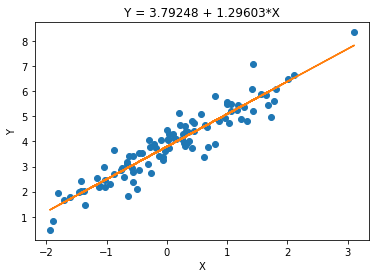

In [108]:
plt.title('Y = %s + %s*X'%(np.round(PolynomCoefs[0],5),np.round(PolynomCoefs[1],5)))
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X,Y,'o')
plt.plot(X,y_prec)

3. Найдем выборочную дисперcию остатков: 
$$S^2 = \frac{\sum_{i=1}^n(Y_i-\widehat{Y_i})^2}{n-2}$$

In [109]:
meanY = [Y.mean()]*n
standev = np.sum(((np.array(y_prec)-np.array(Y))**2))/(n-2)
np.round(standev,6)

0.235484

Используя S, найдем оценки дисперсий для  $\widehat b_0 \: и \: \widehat b_1 $:
$${S_{b_0}}^2 = S^2 \frac{\sum_{i=1}^n(X_i)^2}{n\sum_{i=1}^n(X_i-\bar X)^2} $$

In [110]:
meanX = [X.mean()]*n
standev_b0 = (standev*np.sum(np.array(X)**2))/(n*np.sum((np.array(X)-meanX)**2))
np.round(standev_b0,6)

0.002374

$${S_{b_1}}^2 =  \frac{S^2}{\sum_{i=1}^n(X_i-\bar X)^2} $$

In [111]:
standev_b1 = standev/(np.sum((np.array(X)-np.array(meanX))**2))
np.round(standev_b1,7)

0.0023061

4. Оценим значимость полученных коэффициентов  регрессии $\widehat b_0 \: и \: \widehat b_1$ при помощи t-критерия

$$H_0: \widehat b_0 = 0 $$
$$H_1: \widehat b_0 \neq  0 $$

$Здесь \: и \: далее \: примем: \alpha = 0.05$

$t_{b_0} = \frac{\widehat b_0}{S_{b_0}}$

In [112]:
t_b0 = PolynomCoefs[0]/sqrt(standev_b0)
print('t статистика для b0  = ',np.round(t_b0,6),'>',np.round(st.t.ppf(0.95, len(X)-1),6), 'cледовательно нулевая гипотеза о незначимости коэффициента отвергается')

t статистика для b0  =  77.834417 > 1.660391 cледовательно нулевая гипотеза о незначимости коэффициента отвергается


$$H_0: \widehat b_1 = 0 $$
$$H_1: \widehat b_1 \neq  0 $$

$t_{b_1} = \frac{\widehat b_1}{S_{b_1}}$

In [113]:
t_b1 = PolynomCoefs[1]/sqrt(standev_b1)
print('t статистика для b1  = ',np.round(t_b1,6),'>',np.round(st.t.ppf(0.95, len(X)-1),6),'cледовательно нулевая гипотеза о незначимости коэффициента отвергается')

t статистика для b1  =  26.988219 > 1.660391 cледовательно нулевая гипотеза о незначимости коэффициента отвергается


5. Построим доверительные интервалы для  $\widehat b_0 \: и \: \widehat b_1$ 

Для коэффициента  b0 $$(\widehat{b_0} - t_{1-\alpha/2, n-2}*S_{b_0}, t_{1-\alpha/2, n-2}*S_{b_0} + \widehat{b_0})$$

In [114]:
print('для b0  =', PolynomCoefs[0],"доверительный интервал (",PolynomCoefs[0]-(sqrt(standev_b0)*st.t.ppf(0.95, len(X)-2)),',',PolynomCoefs[0]+(sqrt(standev_b0)*st.t.ppf(0.95, len(X)-2)),")")

для b0  = 3.792476635249959 доверительный интервал ( 3.711566390582341 , 3.873386879917577 )


Для коэффициента  b1 $$(\widehat{b_1} - t_{1-\alpha/2, n-2}*S_{b_1}, t_{1-\alpha/2, n-2}*S_{b_1} + \widehat{b_1})$$

In [115]:
print('для b1  =', PolynomCoefs[1],"доверительный интервал (",PolynomCoefs[1]-(sqrt(standev_b1)*st.t.ppf(0.95, len(X)-2)),',',PolynomCoefs[1]+(sqrt(standev_b1)*st.t.ppf(0.95, len(X)-2)),")")

для b1  = 1.2960298652517035 доверительный интервал ( 1.2162867742775618 , 1.3757729562258452 )


6. Определим коэффициент детерминации: 
$$R = \frac{\sum_{i=1}^n(\widehat Y_i - \bar Y)^2}{\sum_{i=1}^n(Y_i-\bar Y)^2} $$

In [116]:
R = np.sum(((np.array(y_prec)-np.array(meanY))**2))/np.sum(((np.array(Y)-np.array(meanY))**2))
print ('R = ',R) #'коэффициент детерминации близок к единице, что указывает на хорошее качество аппроксимации наблюдаемых данных построенной моделью.')

R =  0.8814081847532439


7. Посмотрим на остатки модели

In [117]:
res = np.array(Y)-np.array(y_prec)

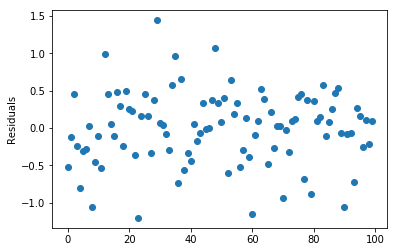

In [118]:
plt.ylabel('Residuals')
plt.plot(res,'o')

(0.48576164074759487, -1.7072142172387563e-15, 0.9909286711435422)

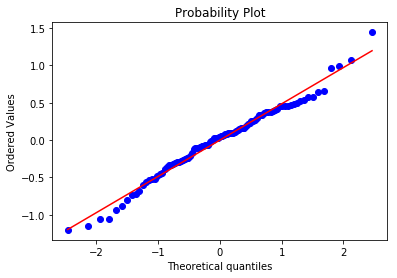

In [119]:
st.probplot(res, plot=plt)[1]

Проверим независимость остатков  при помощи статистики Дарбина-Уотсона. 
$$D = \frac{\sum_{i=1}^n(\epsilon_i - \epsilon_{i-1})^2}{\sum_{i=1}^n(\epsilon_i)^2}$$ 

In [120]:
from statsmodels.stats.stattools import durbin_watson
d1 = 1.654
d2 = 1.694

In [121]:
err = np.array(Y)-np.array(y_prec)
durbin_watson(err)
print('W = ',durbin_watson(err))
print('W > du  => автокорреляция остатков отсутствует' )

W =  1.900475061341908
W > du  => автокорреляция остатков отсутствует


In [122]:
Rxy = st.pearsonr(X,Y)
Rxy

(0.938833416934678, 3.636882755287632e-47)

In [123]:
st.shapiro(np.array(Y)-np.array(y_prec))

(0.9838454127311707, 0.2614295482635498)

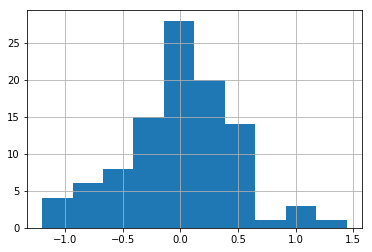

In [124]:
import pandas as pd
err = pd.Series(err)
err.hist()
#график остатков